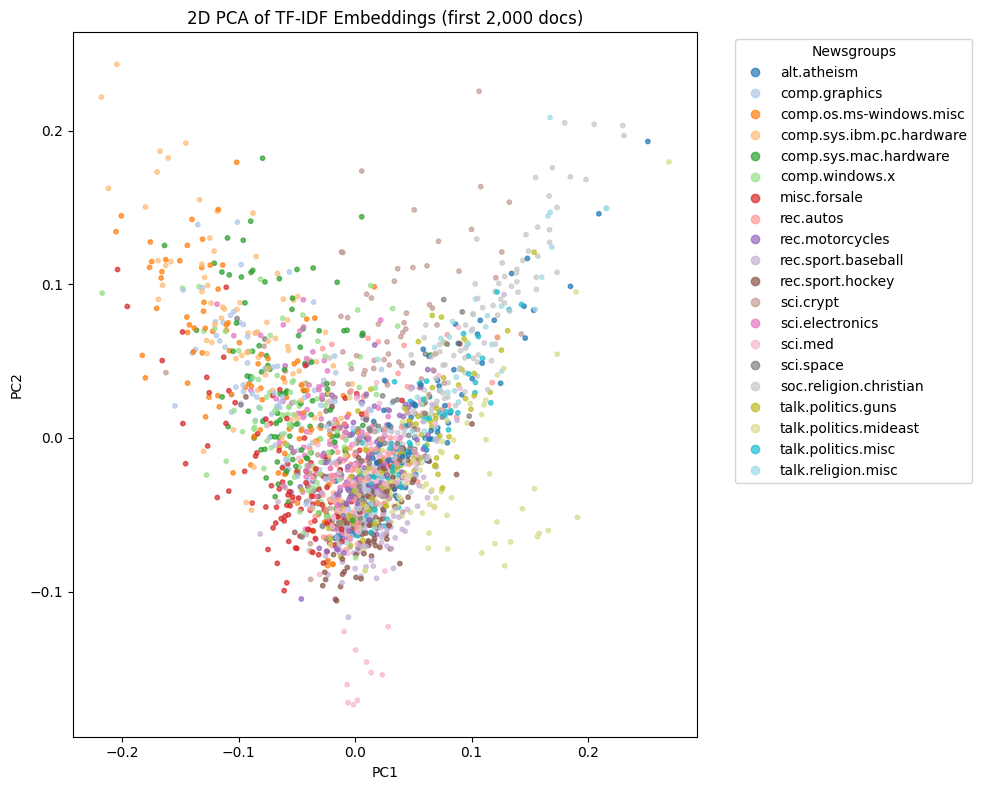

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
docs = newsgroups.data
labels = newsgroups.target
label_names = newsgroups.target_names
vectorizer = TfidfVectorizer(
    max_df=0.95,   
    min_df=2,       
    stop_words='english')

tfidf= vectorizer.fit_transform(docs)

N = 2000
X = tfidf[:N].toarray()
y = labels[:N]

pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

# 4. Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X2[:, 0],
                      X2[:, 1],
                      c=y,
                      s=10,
                      cmap='tab20',
                      alpha=0.7)

# build legend
handles, _ = scatter.legend_elements(num=len(label_names))
plt.legend(handles,
           label_names,
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           title="Newsgroups")

plt.title("2D PCA visualization of TF-IDF Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()
